In [125]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from transformers import AutoTokenizer, AutoModel
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
pd.options.mode.chained_assignment = None

In [126]:
from google.colab import drive
drive.mount("/content/drive/")
%cd /content/drive/MyDrive/event

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/event


In [127]:
event_data = pd.read_csv("embedded_event_data2.csv")

event_data['data_content_bert_embedding'] = [np.asarray([float(x) for x in t[1:-1].split()])
                                                   for t in event_data['data_content_bert_embedding']]

for i in range(len(event_data)):
  event_data['data_content_bert_embedding'][i] = event_data["data_content_bert_embedding"][i].mean()


In [ ]:

X = event_data.drop(columns = ["TimeCreated", "Unnamed: 0"])  # Adjust based on  features

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # Choose an appropriate strategy

# Fit and transform your data
X_imputed = imputer.fit_transform(X)

# Initialize the Isolation Forest model
clf = IsolationForest(contamination="auto")  # Set an appropriate contamination level

# Fit the model to your data
clf.fit(X_imputed)

# Predict anomalies (1 for normal, -1 for anomalies)
anomaly_scores = clf.predict(X_imputed)

# Add the anomaly scores to your original DataFrame
event_data['AnomalyScore'] = anomaly_scores

# Filter out anomalies
normal_data = event_data[event_data['AnomalyScore'] == 1]


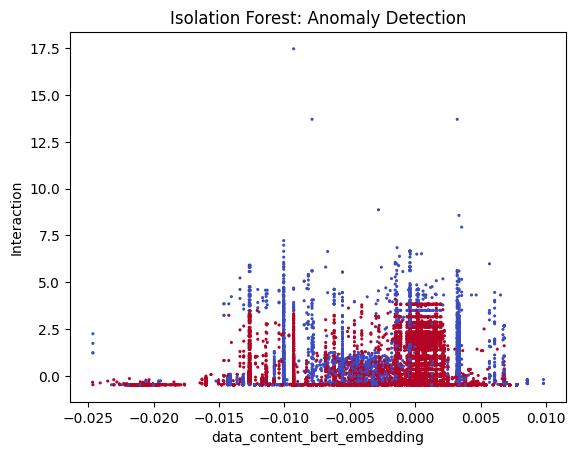

In [104]:
import matplotlib.pyplot as plt  # Add this line to import the module

# Create a scatter plot
plt.scatter(event_data['data_content_bert_embedding'], event_data['Interaction'], c=event_data['AnomalyScore'], cmap='coolwarm', edgecolor='none', s=5)
plt.title('Isolation Forest: Anomaly Detection')
plt.xlabel('data_content_bert_embedding')
plt.ylabel('Interaction')
plt.show()


In [122]:


# Assuming 'event_data' is your DataFrame
event_data = event_data.dropna()
df = event_data.drop(columns=["AnomalyScore", "TimeCreated", "Unnamed: 0"])

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Transform the data using PCA
df_transformed = pca.fit_transform(df)

# Create a DataFrame with column names
column_names = ['PC1', 'PC2']  # Customize column names as needed
data = pd.DataFrame(df_transformed, columns=column_names)
data["AnomalyScore"] = event_data["AnomalyScore"]
# Access explained variance ratio
explained_variance = pca.explained_variance_ratio_


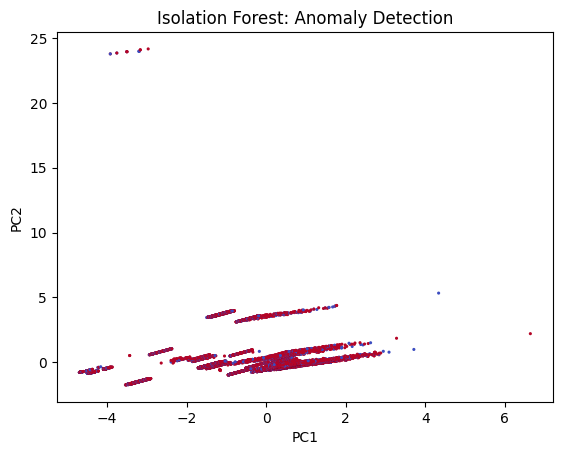

In [124]:
import matplotlib.pyplot as plt  # Add this line to import the module

# Create a scatter plot
plt.scatter(data['PC1'], data['PC2'], c=data['AnomalyScore'], cmap='coolwarm', edgecolor='none', s=5)
plt.title('Isolation Forest: Anomaly Detection')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
